In [ ]:
!pip install pandas matplotlib

In [ ]:
!pip install scikit-learn

## Collecting Data

In [2]:
#read csv file

import pandas as pd

csv_df = pd.read_csv("data/ai4i2020a.csv")

In [32]:
#read sqlite

import sqlite3

conn = sqlite3.connect('data/ai4i2020b.sqlite')
sql_df = pd.read_sql_query("SELECT * FROM failure", conn)
conn.close()

In [25]:
csv_df.head()

,Product ID,Type,Air temperature [C],Process temperature [C],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,Failure type
0,M0000A,M,27.165941,36.769036,1551.0,39.883835,0.0,0,NOT
1,M14860,M,24.950000,35.450000,1551.0,42.800000,0.0,0,NOT
2,L47181,L,25.050000,35.550000,1408.0,46.300000,3.0,0,NOT
3,L47182,L,24.950000,35.350000,1498.0,49.400000,5.0,0,NOT
4,L47183,L,25.050000,35.450000,1433.0,39.500000,7.0,0,NOT


In [10]:
sql_df.head()

,ID,Air_Temperature_K,ProcessTemperature_K,Rotational_speed,Torque,Tool_wear,Failure,TWF,HDF,PWF,OSF,RNF
0,M19859,303.7,312.9,1532,41.3,32,0,0,0,0,0,0
1,L52180,303.7,312.8,1832,23.6,35,0,0,0,0,0,0
2,M19861,303.6,312.7,2174,17.6,37,0,0,0,0,0,0
3,L52182,303.7,312.8,1627,31.7,40,0,0,0,0,0,0
4,L52183,303.7,312.8,1437,51.3,42,0,0,0,0,0,0


## Describing Data

In [22]:
csv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5983 entries, 0 to 5982
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product ID               5983 non-null   object 
 1   Type                     5983 non-null   object 
 2   Air temperature [C]      5972 non-null   float64
 3   Process temperature [C]  5978 non-null   float64
 4   Rotational speed [rpm]   5978 non-null   float64
 5   Torque [Nm]              5982 non-null   float64
 6   Tool wear [min]          5980 non-null   float64
 7   Machine failure          5983 non-null   int64  
 8   Failure type             5983 non-null   object 
dtypes: float64(5), int64(1), object(3)
memory usage: 420.8+ KB


In [24]:
csv_df.describe()

,Air temperature [C],Process temperature [C],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
count,5983.000000,5983.000000,5983.000000,5983.000000,5983.000000,5983.000000
mean,27.165941,36.769036,1540.695718,39.883835,108.735452,0.039612
std,2.283242,1.665599,182.719003,9.898964,63.836580,0.195063
min,22.150000,32.550000,1168.000000,3.800000,0.000000,0.000000
25%,25.150000,35.450000,1423.000000,33.200000,54.000000,0.000000
50%,27.250000,36.550000,1504.000000,40.000000,109.000000,0.000000
75%,29.150000,37.950000,1613.000000,46.700000,163.000000,0.000000
max,31.350000,40.650000,2886.000000,76.200000,251.000000,1.000000


In [26]:
filtered_df = csv_df.loc[csv_df['Type'] == 'L']

filtered_df.describe()

,Air temperature [C],Process temperature [C],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
count,3595.000000,3595.000000,3595.000000,3595.000000,3595.000000,3595.000000
mean,27.171422,36.767029,1541.607619,39.894214,109.676422,0.043672
std,2.264046,1.647814,185.985128,10.025461,64.115699,0.204392
min,22.150000,32.550000,1192.000000,3.800000,0.000000,0.000000
25%,25.150000,35.450000,1422.500000,33.150000,55.000000,0.000000
50%,27.165941,36.650000,1504.000000,40.000000,111.000000,0.000000
75%,29.150000,37.950000,1614.000000,46.800000,164.000000,0.000000
max,31.350000,40.650000,2886.000000,71.600000,251.000000,1.000000


In [27]:
categorical_columns = ["Type","Machine failure", "Failure type"]
for col in categorical_columns:
    print(f"Categories in column '{col}':")
    print(csv_df[col].unique()) 
    print("\n")

Categories in column 'Type':
['M' 'L' 'H']


Categories in column 'Machine failure':
[0 1]


Categories in column 'Failure type':
['NOT' 'PWF' 'TWF' 'OSF' 'RNF' 'OTHER' 'HDF']




In [33]:
sql_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5019 entries, 0 to 5018
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    5019 non-null   object 
 1   Air_Temperature_K     5019 non-null   float64
 2   ProcessTemperature_K  5019 non-null   object 
 3   Rotational_speed      5019 non-null   object 
 4   Torque                5019 non-null   object 
 5   Tool_wear             5019 non-null   object 
 6   Failure               5019 non-null   int64  
 7   TWF                   5019 non-null   int64  
 8   HDF                   5019 non-null   int64  
 9   PWF                   5019 non-null   int64  
 10  OSF                   5019 non-null   int64  
 11  RNF                   5019 non-null   int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 470.7+ KB


In [35]:
num_columns = ["ProcessTemperature_K","Rotational_speed","Torque","Tool_wear"]
for col in num_columns:
    sql_df[col] = pd.to_numeric(sql_df[col], errors='coerce')

sql_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5019 entries, 0 to 5018
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    5019 non-null   object 
 1   Air_Temperature_K     5019 non-null   float64
 2   ProcessTemperature_K  5014 non-null   float64
 3   Rotational_speed      5016 non-null   float64
 4   Torque                5013 non-null   float64
 5   Tool_wear             5017 non-null   float64
 6   Failure               5019 non-null   int64  
 7   TWF                   5019 non-null   int64  
 8   HDF                   5019 non-null   int64  
 9   PWF                   5019 non-null   int64  
 10  OSF                   5019 non-null   int64  
 11  RNF                   5019 non-null   int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 470.7+ KB


In [52]:
sql_df.describe()

,Air_Temperature_K,ProcessTemperature_K,Rotational_speed,Torque,Tool_wear,Failure,TWF,HDF,PWF,OSF,RNF
count,5019.000000,5014.000000,5016.000000,5013.000000,5017.000000,5019.000000,5019.000000,5019.000000,5019.000000,5019.000000,5019.000000
mean,299.188643,309.552333,1535.590510,40.164692,107.365358,0.024308,0.005579,0.001793,0.009364,0.012154,0.002391
std,16.336889,16.388577,173.434366,10.006983,63.381024,0.154018,0.074490,0.042312,0.096325,0.109583,0.048843
min,24.850000,35.550000,1181.000000,9.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,298.700000,309.600000,1423.000000,33.300000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,300.300000,310.600000,1501.000000,40.200000,107.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,301.100000,311.500000,1609.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,304.500000,313.800000,2710.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [31]:
categorical_columns = ["Failure","TWF","HDF","PWF","OSF","RNF"]
for col in categorical_columns:
    print(f"Categories in column '{col}':")
    print(sql_df[col].unique()) 
    print("\n")

Categories in column 'Failure':
[0 1]


Categories in column 'TWF':
[0 1]


Categories in column 'HDF':
[0 1]


Categories in column 'PWF':
[0 1]


Categories in column 'OSF':
[0 1]


Categories in column 'RNF':
[0 1]




## Exploring Data

In [33]:
csv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5983 entries, 0 to 5982
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product ID               5983 non-null   object 
 1   Type                     5983 non-null   object 
 2   Air temperature [C]      5983 non-null   float64
 3   Process temperature [C]  5983 non-null   float64
 4   Rotational speed [rpm]   5983 non-null   float64
 5   Torque [Nm]              5983 non-null   float64
 6   Tool wear [min]          5983 non-null   float64
 7   Machine failure          5983 non-null   int64  
 8   Failure type             5983 non-null   object 
dtypes: float64(5), int64(1), object(3)
memory usage: 420.8+ KB


In [4]:
import matplotlib.pyplot as plt

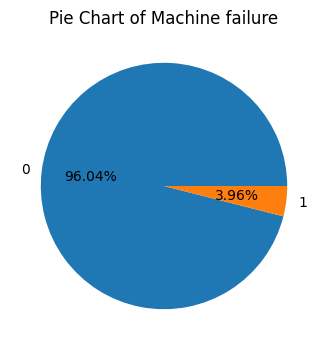

In [49]:
column_name = 'Machine failure'

# Step 1: Calculate the value counts for the column
category_counts = csv_df[column_name].value_counts()

# Step 2: Plot the pie chart
plt.figure(figsize=(4, 4))  # Optional: set the figure size
plt.pie(category_counts, labels=category_counts.index, autopct='%1.2f%%')

# Step 3: Add a title
plt.title(f'Pie Chart of {column_name}')

# Step 4: Display the pie chart
plt.show()

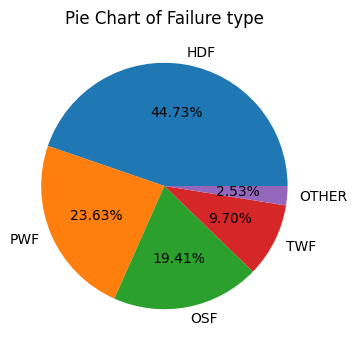

In [50]:
df_filtered = csv_df[csv_df["Machine failure"] != 0]

column_name = 'Failure type'

# Step 1: Calculate the value counts for the column
category_counts = df_filtered[column_name].value_counts()

# Step 2: Plot the pie chart
plt.figure(figsize=(4, 4))  # Optional: set the figure size
plt.pie(category_counts, labels=category_counts.index, autopct='%1.2f%%')

# Step 3: Add a title
plt.title(f'Pie Chart of {column_name}')

# Step 4: Display the pie chart
plt.show()

C:\Users\imed\AppData\Local\Temp\ipykernel_1268\93362755.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=['Air temperature [C]', 'Process temperature [C]'])


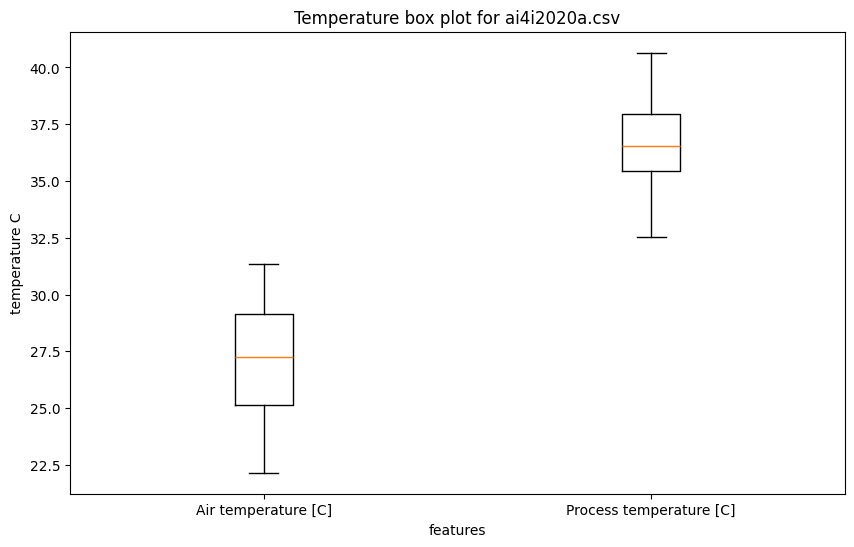

In [60]:
# Step 1: Prepare the data for the box plot
data_to_plot = [
    csv_df['Air temperature [C]'].dropna(),
    csv_df['Process temperature [C]'].dropna()
]

# Step 2: Create the box plot
plt.figure(figsize=(10, 6))
plt.boxplot(data_to_plot, labels=['Air temperature [C]', 'Process temperature [C]'])

# Step 3: Add title and labels
plt.title('Temperature box plot for ai4i2020a.csv')
plt.ylabel('temperature C')
plt.xlabel('features')

# Step 4: Display the box plot
plt.show()

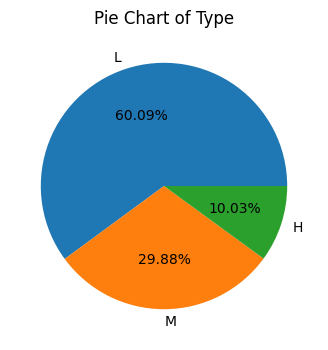

In [5]:
column_name = 'Type'

# Step 1: Calculate the value counts for the column
category_counts = csv_df[column_name].value_counts()

# Step 2: Plot the pie chart
plt.figure(figsize=(4, 4))  # Optional: set the figure size
plt.pie(category_counts, labels=category_counts.index, autopct='%1.2f%%')

# Step 3: Add a title
plt.title(f'Pie Chart of {column_name}')

# Step 4: Display the pie chart
plt.show()

In [13]:
numerical_columns = ['Air temperature [C]','Process temperature [C]','Rotational speed [rpm]','Torque [Nm]','Tool wear [min]']
for col in numerical_columns:
    csv_df[col] = csv_df[col].fillna(csv_df[col].mean())

csv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5983 entries, 0 to 5982
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product ID               5983 non-null   object 
 1   Type                     5983 non-null   object 
 2   Air temperature [C]      5983 non-null   float64
 3   Process temperature [C]  5983 non-null   float64
 4   Rotational speed [rpm]   5983 non-null   float64
 5   Torque [Nm]              5983 non-null   float64
 6   Tool wear [min]          5983 non-null   float64
 7   Machine failure          5983 non-null   int64  
 8   Failure type             5983 non-null   object 
dtypes: float64(5), int64(1), object(3)
memory usage: 420.8+ KB


In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
selected_cols = ["Air temperature [C]","Process temperature [C]","Rotational speed [rpm]","Torque [Nm]","Tool wear [min]"]
selected_data = csv_df[selected_cols]

principal_components = pca.fit_transform(selected_data)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

pca_df.head()

,PC1,PC2
0,10.612126,-108.705204
1,10.472944,-108.709854
2,-132.540318,-106.126348
3,-42.794854,-103.870848
4,-107.257908,-102.045929


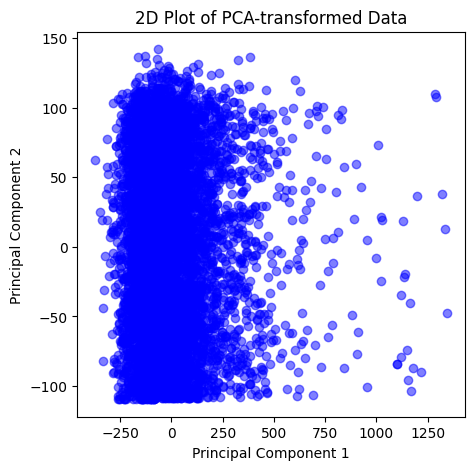

In [19]:
df_with_pca = pd.concat([csv_df.reset_index(drop=True), pca_df], axis=1)

# Step 5: Plot the samples in 2D using PC1 and PC2
plt.figure(figsize=(5, 5))
plt.scatter(df_with_pca['PC1'], df_with_pca['PC2'], c='b', alpha=0.5)

# Label the axes
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Add a title
plt.title('2D Plot of PCA-transformed Data')

# Show the plot
plt.show()

In [20]:
sql_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5019 entries, 0 to 5018
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    5019 non-null   object 
 1   Air_Temperature_K     5019 non-null   float64
 2   ProcessTemperature_K  5014 non-null   float64
 3   Rotational_speed      5016 non-null   float64
 4   Torque                5013 non-null   float64
 5   Tool_wear             5017 non-null   float64
 6   Failure               5019 non-null   int64  
 7   TWF                   5019 non-null   int64  
 8   HDF                   5019 non-null   int64  
 9   PWF                   5019 non-null   int64  
 10  OSF                   5019 non-null   int64  
 11  RNF                   5019 non-null   int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 470.7+ KB


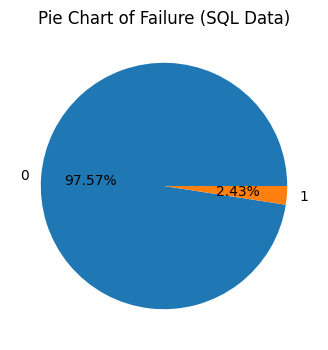

In [22]:
column_name = 'Failure'

# Step 1: Calculate the value counts for the column
category_counts = sql_df[column_name].value_counts()

# Step 2: Plot the pie chart
plt.figure(figsize=(4, 4))  # Optional: set the figure size
plt.pie(category_counts, labels=category_counts.index, autopct='%1.2f%%')

# Step 3: Add a title
plt.title(f'Pie Chart of {column_name} (SQL Data)')

# Step 4: Display the pie chart
plt.show()

t3 failures kifah ??????????????????

C:\Users\imed\AppData\Local\Temp\ipykernel_7156\988493985.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=['Air_Temperature_K', 'ProcessTemperature_K'])


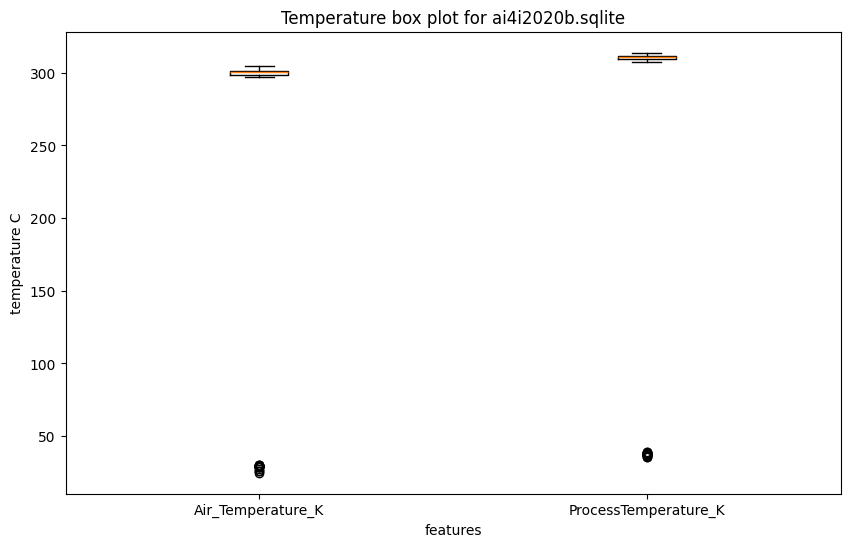

In [26]:
# Step 1: Prepare the data for the box plot
data_to_plot = [
    sql_df['Air_Temperature_K'].dropna(),
    sql_df['ProcessTemperature_K'].dropna()
]

# Step 2: Create the box plot
plt.figure(figsize=(10, 6))
plt.boxplot(data_to_plot, labels=['Air_Temperature_K', 'ProcessTemperature_K'])

# Step 3: Add title and labels
plt.title('Temperature box plot for ai4i2020b.sqlite')
plt.ylabel('temperature C')
plt.xlabel('features')

# Step 4: Display the box plot
plt.show()

In [28]:
sql_df["Type"] = sql_df["ID"].str[0]
sql_df.head()

,ID,Air_Temperature_K,ProcessTemperature_K,Rotational_speed,Torque,Tool_wear,Failure,TWF,HDF,PWF,OSF,RNF,Type
0,M19859,303.7,312.9,1532.0,41.3,32.0,0,0,0,0,0,0,M
1,L52180,303.7,312.8,1832.0,23.6,35.0,0,0,0,0,0,0,L
2,M19861,303.6,312.7,2174.0,17.6,37.0,0,0,0,0,0,0,M
3,L52182,303.7,312.8,1627.0,31.7,40.0,0,0,0,0,0,0,L
4,L52183,303.7,312.8,1437.0,51.3,42.0,0,0,0,0,0,0,L


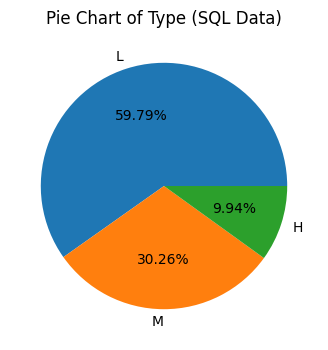

In [29]:
column_name = 'Type'

# Step 1: Calculate the value counts for the column
category_counts = sql_df[column_name].value_counts()

# Step 2: Plot the pie chart
plt.figure(figsize=(4, 4))  # Optional: set the figure size
plt.pie(category_counts, labels=category_counts.index, autopct='%1.2f%%')

# Step 3: Add a title
plt.title(f'Pie Chart of {column_name} (SQL Data)')

# Step 4: Display the pie chart
plt.show()

In [31]:
sql_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5019 entries, 0 to 5018
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    5019 non-null   object 
 1   Air_Temperature_K     5019 non-null   float64
 2   ProcessTemperature_K  5014 non-null   float64
 3   Rotational_speed      5016 non-null   float64
 4   Torque                5013 non-null   float64
 5   Tool_wear             5017 non-null   float64
 6   Failure               5019 non-null   int64  
 7   TWF                   5019 non-null   int64  
 8   HDF                   5019 non-null   int64  
 9   PWF                   5019 non-null   int64  
 10  OSF                   5019 non-null   int64  
 11  RNF                   5019 non-null   int64  
 12  Type                  5019 non-null   object 
dtypes: float64(5), int64(6), object(2)
memory usage: 509.9+ KB


In [36]:
numerical_columns = ['ProcessTemperature_K','Rotational_speed','Torque','Tool_wear']
for col in numerical_columns:
    sql_df[col] = sql_df[col].fillna(sql_df[col].mean())

sql_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5019 entries, 0 to 5018
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    5019 non-null   object 
 1   Air_Temperature_K     5019 non-null   float64
 2   ProcessTemperature_K  5019 non-null   float64
 3   Rotational_speed      5019 non-null   float64
 4   Torque                5019 non-null   float64
 5   Tool_wear             5019 non-null   float64
 6   Failure               5019 non-null   int64  
 7   TWF                   5019 non-null   int64  
 8   HDF                   5019 non-null   int64  
 9   PWF                   5019 non-null   int64  
 10  OSF                   5019 non-null   int64  
 11  RNF                   5019 non-null   int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 470.7+ KB


In [37]:
pca = PCA(n_components=2)
selected_cols = ["Air_Temperature_K",'ProcessTemperature_K','Rotational_speed','Torque','Tool_wear']
selected_data = sql_df[selected_cols]

principal_components = pca.fit_transform(selected_data)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

pca_df.head()

,PC1,PC2
0,-3.602899,-75.508838
1,296.892040,-72.473717
2,638.739619,-70.430181
3,91.756612,-67.500205
4,-98.979943,-65.522702


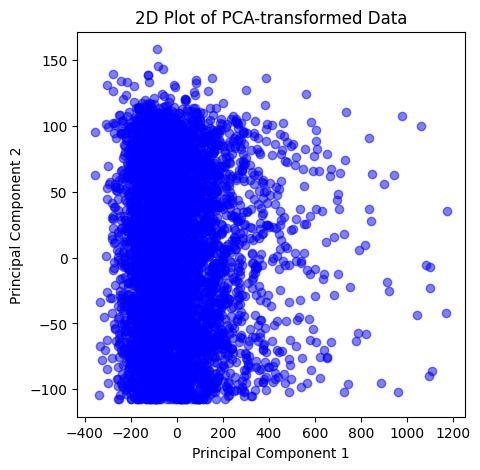

In [38]:
df_with_pca = pd.concat([sql_df.reset_index(drop=True), pca_df], axis=1)

# Step 5: Plot the samples in 2D using PC1 and PC2
plt.figure(figsize=(5, 5))
plt.scatter(df_with_pca['PC1'], df_with_pca['PC2'], c='b', alpha=0.5)

# Label the axes
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Add a title
plt.title('2D Plot of PCA-transformed Data')

# Show the plot
plt.show()

## Verifying Data Quality

In [40]:
#read csv file

import pandas as pd

csv_df = pd.read_csv("data/ai4i2020a.csv")

#read sqlite

import sqlite3

conn = sqlite3.connect('data/ai4i2020b.sqlite')
sql_df = pd.read_sql_query("SELECT * FROM failure", conn)
conn.close()

In [51]:
num_columns = ["ProcessTemperature_K","Rotational_speed","Torque","Tool_wear"]
for col in num_columns:
    sql_df[col] = pd.to_numeric(sql_df[col], errors='coerce')

sql_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5019 entries, 0 to 5018
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    5019 non-null   object 
 1   Air_Temperature_K     5019 non-null   float64
 2   ProcessTemperature_K  5014 non-null   float64
 3   Rotational_speed      5016 non-null   float64
 4   Torque                5013 non-null   float64
 5   Tool_wear             5017 non-null   float64
 6   Failure               5019 non-null   int64  
 7   TWF                   5019 non-null   int64  
 8   HDF                   5019 non-null   int64  
 9   PWF                   5019 non-null   int64  
 10  OSF                   5019 non-null   int64  
 11  RNF                   5019 non-null   int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 470.7+ KB


In [44]:
# Step 1: Find rows with at least one missing value
samples_with_omitted_values = csv_df[csv_df.isnull().any(axis=1)]

# Step 2: Display the samples
samples_with_omitted_values.head()

,Product ID,Type,Air temperature [C],Process temperature [C],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,Failure type
0,M0000A,M,NaN,NaN,1551.0,NaN,0.0,0,NOT
1435,H30850,H,25.65,NaN,1510.0,44.2,35.0,0,NOT
2786,L49968,L,NaN,36.45,1326.0,52.4,57.0,0,NOT
2791,L49973,L,NaN,36.45,1597.0,31.8,73.0,0,NOT
2796,L49978,L,NaN,36.45,1568.0,39.6,85.0,0,NOT


In [49]:
# Step 1: Filter rows where Machine failure is 0 but Failure type is not 'NOT'
contradiction_samples = csv_df[(csv_df['Machine failure'] == 0) & (csv_df['Failure type'] != 'NOT')]

# Step 2: Display the samples
contradiction_samples.head()

,Product ID,Type,Air temperature [C],Process temperature [C],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,Failure type
1221,M16081,M,23.85,35.15,1399.0,46.4,132.0,0,RNF
1302,L48482,L,25.45,36.65,1505.0,45.7,144.0,0,RNF
1746,H31162,H,25.25,34.55,1626.0,31.1,166.0,0,RNF
2070,L49252,L,26.45,36.35,1570.0,35.5,189.0,0,RNF
2557,L49739,L,26.15,35.85,1447.0,50.4,140.0,0,RNF


In [55]:
## SQL data

# Step 1: Find rows with at least one missing value
samples_with_omitted_values = sql_df[sql_df.isnull().any(axis=1)]

# Step 2: Display the samples
samples_with_omitted_values.head()

,ID,Air_Temperature_K,ProcessTemperature_K,Rotational_speed,Torque,Tool_wear,Failure,TWF,HDF,PWF,OSF,RNF
740,M20599,302.2,NaN,1653.0,NaN,2.0,0,0,0,0,0,0
741,M20600,302.3,NaN,1535.0,NaN,5.0,0,0,0,0,0,0
742,M20601,302.3,NaN,1483.0,40.5,NaN,0,0,0,0,0,0
743,L52922,302.3,NaN,1414.0,47.0,NaN,0,0,0,0,0,0
744,M20603,302.2,311.6,NaN,NaN,13.0,0,0,0,0,0,0


In [56]:
sql_df.head()

,ID,Air_Temperature_K,ProcessTemperature_K,Rotational_speed,Torque,Tool_wear,Failure,TWF,HDF,PWF,OSF,RNF
0,M19859,303.7,312.9,1532.0,41.3,32.0,0,0,0,0,0,0
1,L52180,303.7,312.8,1832.0,23.6,35.0,0,0,0,0,0,0
2,M19861,303.6,312.7,2174.0,17.6,37.0,0,0,0,0,0,0
3,L52182,303.7,312.8,1627.0,31.7,40.0,0,0,0,0,0,0
4,L52183,303.7,312.8,1437.0,51.3,42.0,0,0,0,0,0,0


In [57]:
sql_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5019 entries, 0 to 5018
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    5019 non-null   object 
 1   Air_Temperature_K     5019 non-null   float64
 2   ProcessTemperature_K  5014 non-null   float64
 3   Rotational_speed      5016 non-null   float64
 4   Torque                5013 non-null   float64
 5   Tool_wear             5017 non-null   float64
 6   Failure               5019 non-null   int64  
 7   TWF                   5019 non-null   int64  
 8   HDF                   5019 non-null   int64  
 9   PWF                   5019 non-null   int64  
 10  OSF                   5019 non-null   int64  
 11  RNF                   5019 non-null   int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 470.7+ KB


In [58]:
# Step 1: Sum the failure class columns to create the 'Sum' column
failure_columns = ['TWF', 'HDF', 'PWF','OSF', 'RNF']  # Replace with your actual failure columns
sql_df['Sum'] = sql_df[failure_columns].sum(axis=1)

# Step 2: Check for contradictions where Machine failure is 0 but Sum is greater than 0
contradiction_samples = sql_df[(sql_df['Failure'] == 0) & (sql_df['Sum'] != 0)]

# Step 3: Display the contradiction samples
contradiction_samples.head()

,ID,Air_Temperature_K,ProcessTemperature_K,Rotational_speed,Torque,Tool_wear,Failure,TWF,HDF,PWF,OSF,RNF,Sum
472,L52651,302.7,312.3,1346.0,61.2,170.0,0,0,0,0,0,1,1
490,L52669,302.6,312.1,1499.0,35.0,215.0,0,0,0,0,0,1,1
496,H34909,302.9,312.5,1357.0,55.0,12.0,0,0,0,0,0,1,1
510,L52689,302.8,312.2,1509.0,36.5,52.0,0,0,0,0,0,1,1
554,L52733,302.5,311.9,1306.0,59.7,172.0,0,0,0,0,0,1,1


# 3- Data Preparation

### 3.1- Selecting Data

### 3-2 Constructing new data

In [59]:
csv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5983 entries, 0 to 5982
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product ID               5983 non-null   object 
 1   Type                     5983 non-null   object 
 2   Air temperature [C]      5972 non-null   float64
 3   Process temperature [C]  5978 non-null   float64
 4   Rotational speed [rpm]   5978 non-null   float64
 5   Torque [Nm]              5982 non-null   float64
 6   Tool wear [min]          5980 non-null   float64
 7   Machine failure          5983 non-null   int64  
 8   Failure type             5983 non-null   object 
dtypes: float64(5), int64(1), object(3)
memory usage: 420.8+ KB


In [60]:
temp_columns = ["Air temperature [C]","Process temperature [C]"]

csv_df['Air temperature [K]'] = csv_df["Air temperature [C]"] + 273.15
csv_df['Process temperature [K]'] = csv_df["Process temperature [C]"] + 273.15

csv_df.head()

,Product ID,Type,Air temperature [C],Process temperature [C],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,Failure type,Air temperature [K],Process temperature [K]
0,M0000A,M,NaN,NaN,1551.0,NaN,0.0,0,NOT,NaN,NaN
1,M14860,M,24.95,35.45,1551.0,42.8,0.0,0,NOT,298.1,308.6
2,L47181,L,25.05,35.55,1408.0,46.3,3.0,0,NOT,298.2,308.7
3,L47182,L,24.95,35.35,1498.0,49.4,5.0,0,NOT,298.1,308.5
4,L47183,L,25.05,35.45,1433.0,39.5,7.0,0,NOT,298.2,308.6


In [64]:
failure_types = ['PWF', 'TWF', 'OSF', 'RNF', 'OTHER', 'HDF']  # All failure types except 'NOT'

# Step 1: Create a binary column for each failure type
for failure in failure_types:
    csv_df[f'{failure}_binary'] = csv_df['Failure type'].apply(lambda x: 1 if x == failure else 0)

# Step 2: Check the new columns
csv_df.head()

## remember to drop original columns

,Product ID,Type,Air temperature [C],Process temperature [C],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,Failure type,Air temperature [K],Process temperature [K],PWF_binary,TWF_binary,OSF_binary,RNF_binary,OTHER_binary,HDF_binary
0,M0000A,M,NaN,NaN,1551.0,NaN,0.0,0,NOT,NaN,NaN,0,0,0,0,0,0
1,M14860,M,24.95,35.45,1551.0,42.8,0.0,0,NOT,298.1,308.6,0,0,0,0,0,0
2,L47181,L,25.05,35.55,1408.0,46.3,3.0,0,NOT,298.2,308.7,0,0,0,0,0,0
3,L47182,L,24.95,35.35,1498.0,49.4,5.0,0,NOT,298.1,308.5,0,0,0,0,0,0
4,L47183,L,25.05,35.45,1433.0,39.5,7.0,0,NOT,298.2,308.6,0,0,0,0,0,0


In [65]:
sql_df.head()

,ID,Air_Temperature_K,ProcessTemperature_K,Rotational_speed,Torque,Tool_wear,Failure,TWF,HDF,PWF,OSF,RNF,Sum
0,M19859,303.7,312.9,1532.0,41.3,32.0,0,0,0,0,0,0,0
1,L52180,303.7,312.8,1832.0,23.6,35.0,0,0,0,0,0,0,0
2,M19861,303.6,312.7,2174.0,17.6,37.0,0,0,0,0,0,0,0
3,L52182,303.7,312.8,1627.0,31.7,40.0,0,0,0,0,0,0,0
4,L52183,303.7,312.8,1437.0,51.3,42.0,0,0,0,0,0,0,0


In [66]:
# Step 1: Create the 'OTHER' column based on the conditions
sql_df['OTHER'] = sql_df.apply(lambda row: 1 if (row['Failure'] == 1 and row['Sum'] == 0) else 0, axis=1)

sql_df.head()

,ID,Air_Temperature_K,ProcessTemperature_K,Rotational_speed,Torque,Tool_wear,Failure,TWF,HDF,PWF,OSF,RNF,Sum,OTHER
0,M19859,303.7,312.9,1532.0,41.3,32.0,0,0,0,0,0,0,0,0
1,L52180,303.7,312.8,1832.0,23.6,35.0,0,0,0,0,0,0,0,0
2,M19861,303.6,312.7,2174.0,17.6,37.0,0,0,0,0,0,0,0,0
3,L52182,303.7,312.8,1627.0,31.7,40.0,0,0,0,0,0,0,0,0
4,L52183,303.7,312.8,1437.0,51.3,42.0,0,0,0,0,0,0,0,0


In [67]:
sql_df["Type"] = sql_df["ID"].str[0]
sql_df.head()

,ID,Air_Temperature_K,ProcessTemperature_K,Rotational_speed,Torque,Tool_wear,Failure,TWF,HDF,PWF,OSF,RNF,Sum,OTHER,Type
0,M19859,303.7,312.9,1532.0,41.3,32.0,0,0,0,0,0,0,0,0,M
1,L52180,303.7,312.8,1832.0,23.6,35.0,0,0,0,0,0,0,0,0,L
2,M19861,303.6,312.7,2174.0,17.6,37.0,0,0,0,0,0,0,0,0,M
3,L52182,303.7,312.8,1627.0,31.7,40.0,0,0,0,0,0,0,0,0,L
4,L52183,303.7,312.8,1437.0,51.3,42.0,0,0,0,0,0,0,0,0,L


In [85]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
encoder.fit(csv_df[['Type']])


encoded_csv_df = pd.DataFrame(encoder.transform(csv_df[['Type']]), columns=encoder.get_feature_names_out(['Type'])) 

csv_df = pd.concat([csv_df, encoded_csv_df], axis=1)

csv_df.head()

,Product ID,Type,Air temperature [C],Process temperature [C],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,Failure type,Air temperature [K],Process temperature [K],PWF_binary,TWF_binary,OSF_binary,RNF_binary,OTHER_binary,HDF_binary,Type_H,Type_L,Type_M
0,M0000A,M,NaN,NaN,1551.0,NaN,0.0,0,NOT,NaN,NaN,0,0,0,0,0,0,0.0,0.0,1.0
1,M14860,M,24.95,35.45,1551.0,42.8,0.0,0,NOT,298.1,308.6,0,0,0,0,0,0,0.0,0.0,1.0
2,L47181,L,25.05,35.55,1408.0,46.3,3.0,0,NOT,298.2,308.7,0,0,0,0,0,0,0.0,1.0,0.0
3,L47182,L,24.95,35.35,1498.0,49.4,5.0,0,NOT,298.1,308.5,0,0,0,0,0,0,0.0,1.0,0.0
4,L47183,L,25.05,35.45,1433.0,39.5,7.0,0,NOT,298.2,308.6,0,0,0,0,0,0,0.0,1.0,0.0


In [87]:
encoded_sql_df = pd.DataFrame(encoder.transform(sql_df[['Type']]), columns=encoder.get_feature_names_out(['Type'])) 

sql_df = pd.concat([sql_df, encoded_sql_df], axis=1)

sql_df.head()

,ID,Air_Temperature_K,ProcessTemperature_K,Rotational_speed,Torque,Tool_wear,Failure,TWF,HDF,PWF,OSF,RNF,Sum,OTHER,Type,Type_H,Type_L,Type_M
0,M19859,303.7,312.9,1532.0,41.3,32.0,0,0,0,0,0,0,0,0,M,0.0,0.0,1.0
1,L52180,303.7,312.8,1832.0,23.6,35.0,0,0,0,0,0,0,0,0,L,0.0,1.0,0.0
2,M19861,303.6,312.7,2174.0,17.6,37.0,0,0,0,0,0,0,0,0,M,0.0,0.0,1.0
3,L52182,303.7,312.8,1627.0,31.7,40.0,0,0,0,0,0,0,0,0,L,0.0,1.0,0.0
4,L52183,303.7,312.8,1437.0,51.3,42.0,0,0,0,0,0,0,0,0,L,0.0,1.0,0.0


### 3.3- Integrating Data

In [88]:
csv_df.head()

,Product ID,Type,Air temperature [C],Process temperature [C],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,Failure type,Air temperature [K],Process temperature [K],PWF_binary,TWF_binary,OSF_binary,RNF_binary,OTHER_binary,HDF_binary,Type_H,Type_L,Type_M
0,M0000A,M,NaN,NaN,1551.0,NaN,0.0,0,NOT,NaN,NaN,0,0,0,0,0,0,0.0,0.0,1.0
1,M14860,M,24.95,35.45,1551.0,42.8,0.0,0,NOT,298.1,308.6,0,0,0,0,0,0,0.0,0.0,1.0
2,L47181,L,25.05,35.55,1408.0,46.3,3.0,0,NOT,298.2,308.7,0,0,0,0,0,0,0.0,1.0,0.0
3,L47182,L,24.95,35.35,1498.0,49.4,5.0,0,NOT,298.1,308.5,0,0,0,0,0,0,0.0,1.0,0.0
4,L47183,L,25.05,35.45,1433.0,39.5,7.0,0,NOT,298.2,308.6,0,0,0,0,0,0,0.0,1.0,0.0


In [ ]:
final_df.rename(columns={
    'OldColumnName': 'NewColumnName'
    }, inplace=True)